In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations

In [67]:
unique_followers = {}
brand_followers = {}
limit = 100
row_id = 0
with open('data/brand_followers_final.tsv') as data_file:
    for row in data_file:
        followers = row.split()
        brand = followers.pop(0)
        brand_followers[brand] = []
        if len(followers) > 1000:  #Filtering brands with less than 1000 followers
            for x in followers:
                f = int(x)
                brand_followers[brand].append(f)
                if f not in unique_followers.keys():
                    unique_followers[f] = []
                unique_followers[f].append(brand)
        row_id += 1
        if row_id == limit:
            break
                
print('No. of Unique Followers', len(unique_followers.keys()))
print('No. of Brands', len(brand_followers.keys()))

No. of Unique Followers 4133961
No. of Brands 100


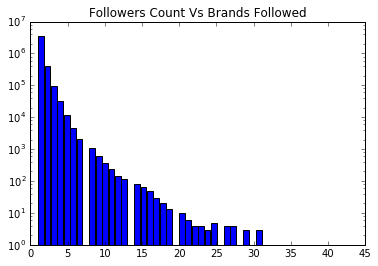

In [68]:
hist, bins = np.histogram(np.asarray([len(v) for v in list(unique_followers.values())]),bins=50)    
width = 0.9 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.yscale("log")
plt.bar(center, hist, align='center', width=width)
plt.title('Followers Count Vs Brands Followed')

In [76]:
choice = random.choice(range(len(brand_followers.keys())))
#choice = 100
follower_id = sorted(unique_followers.items(), key=lambda x: len(x[1]), reverse=True)[choice][0]
print('Chosen follower %d who follows %d brands'%(follower_id,len(unique_followers[follower_id])))

Chosen follower 62969155 who follows 33 brands


In [77]:
unique_followers[follower_id]

['100percentpure',
 '5hourenergy',
 '8oclockcoffee',
 '8thcontinentsoy',
 'acneorg',
 'alchimieforever',
 'allegrocoffee',
 'allure_magazine',
 'alternahaircare',
 'amanabrand',
 'ampenergy',
 'annieshomegrown',
 'anntaylor',
 'anthropologie',
 'aquaphorus',
 'arbonne',
 'ardell_lashes',
 'artistrybeauty',
 'asus',
 'att',
 'auracacia',
 'australiangold_',
 'aveda',
 'aveneusa',
 'avoninsider',
 'axe',
 'baby_magic',
 'balancebar',
 'bananaboat',
 'barbarasbakery',
 'barbasolshave',
 'bareminerals',
 'barkeeperfriend']

In [78]:
scores = {}
brands = unique_followers[follower_id]
for b in combinations(brand_followers.keys(), 2):
    if b[0] in brands and b[1] not in brands:
        neighbors = set(brand_followers[b[0]])
        neighbors2 = set(brand_followers[b[1]])
        #scores.append((b[0],b[1], 1. * len(neighbors & neighbors2) / len(neighbors | neighbors2)))
        if b[1] not in scores.keys():
            score = 1. * len(neighbors & neighbors2) / len(neighbors | neighbors2)
            scores[b[1]] = score
        else:
            scores[b[1]] += score
sorted(scores.items(), key=lambda x: x[1]/len(unique_followers[follower_id]), reverse=True)[:20]

[('aubreyorganicsi', 0.00238427152906792),
 ('abreva', 0.002328713314914433),
 ('afterglow', 0.0019267730921594475),
 ('audreywhitby', 0.0018657500014829368),
 ('aidstillreqd', 0.0018221258424741622),
 ('babiesruscanada', 0.0018121911585435096),
 ('acne_free_skin', 0.0017943729851336262),
 ('barsfoods', 0.001766140166805537),
 ('adidas', 0.0017308595606644126),
 ('astonmartin', 0.0017230171323123372),
 ('arcona_la', 0.0017140108008981635),
 ('always', 0.001648878281583654),
 ('alphahydrox', 0.0016476454101349478),
 ('angelicastiffy', 0.0015447739806938197),
 ('airheadscandy', 0.0014801350182580572),
 ('acti_pr', 0.0014731557869524395),
 ('34degrees', 0.0014194331721264762),
 ('acureorganics', 0.0012833705772001057),
 ('alecjones33', 0.0012485230329628122),
 ('antimonkeybutt', 0.001247702061329624)]

In [79]:
pct = 0.75
to_remove = random.sample(unique_followers[follower_id], int(len(unique_followers[follower_id]) * pct))

In [80]:
print('Removed %d brands'% len(to_remove), to_remove)

Removed 24 brands ['bananaboat', 'barkeeperfriend', 'ardell_lashes', 'att', 'avoninsider', 'asus', 'barbasolshave', '100percentpure', 'allure_magazine', 'anntaylor', '5hourenergy', 'alchimieforever', 'alternahaircare', '8oclockcoffee', 'ampenergy', 'auracacia', 'allegrocoffee', 'baby_magic', 'axe', 'aquaphorus', 'balancebar', 'artistrybeauty', 'australiangold_', 'aveda']


In [81]:
brands_followed = set(unique_followers[follower_id])
brands_followed = brands_followed - set(to_remove)

In [82]:
scores = {}
for b in combinations(brand_followers.keys(), 2):
    if b[0] in brands_followed and b[1] not in brands_followed:
        neighbors = set(brand_followers[b[0]]) - set([follower_id])
        neighbors2 = set(brand_followers[b[1]]) - set([follower_id])
        #scores.append((b[0],b[1], 1. * len(neighbors & neighbors2) / len(neighbors | neighbors2)))
        if b[1] not in scores.keys():
            score = 1. * len(neighbors & neighbors2) / len(neighbors | neighbors2)
            scores[b[1]] = score
        else:
            scores[b[1]] += score
prediction = sorted(scores.items(), key=lambda x: x[1]/len(brands_followed), reverse=True)[:len(to_remove)]
print('Predicted:\n',[x[0] for x in prediction])
print('Actual:\n', to_remove)
n_correct = len(set(unique_followers[follower_id]) & set([x[0] for x in prediction]))
print('Jaccard finds %d/%d for accuracy of %.3f' % (n_correct, len(to_remove), 
                                                    (1. * n_correct / len(to_remove))))

Predicted:
 ['barkeeperfriend', 'bananaboat', 'aquaphorus', 'balancebar', '8oclockcoffee', 'baby_magic', 'anntaylor', 'ardell_lashes', 'aveda', 'barsfoods', 'allure_magazine', 'antimonkeybutt', 'abreva', 'astonmartin', 'acne_free_skin', 'adidas', 'aubreyorganicsi', 'audreywhitby', 'babiesruscanada', 'babyganics', 'artisanafoods', 'alphahydrox', 'angelicastiffy', 'artistrybeauty']
Actual:
 ['bananaboat', 'barkeeperfriend', 'ardell_lashes', 'att', 'avoninsider', 'asus', 'barbasolshave', '100percentpure', 'allure_magazine', 'anntaylor', '5hourenergy', 'alchimieforever', 'alternahaircare', '8oclockcoffee', 'ampenergy', 'auracacia', 'allegrocoffee', 'baby_magic', 'axe', 'aquaphorus', 'balancebar', 'artistrybeauty', 'australiangold_', 'aveda']
Jaccard finds 11/24 for accuracy of 0.458
